# Harvesting Models for the Logistic Population

This set of activities has the following goals:

- Present variations of the logistic population growth model that include harvesting.
- Demonstrate how to solve a diferential equation using the course tools.
- Introduce ``pyplot``, the ``matplotlib`` interactive graphics module.

The first step in any computer lab in this course is to import the modules that will be used. Click on the cell below and press ``Shift-Enter`` to run the cell.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import detools

The statements in cell do the following:

- **Line 1**: Tells Jupyter that plots should be displayed "inline", that is, in the notebook itself, instead of using an external backend.
- **Line 2**: Imports the ``numpy`` module, which contains basic data structures and functions for numerical computations. The module is given the abbreviation ``np`` for easy of access.
- **Line 3**: Imports the ``pyplot`` module for interactive graphics, with the abbreviation ``plt``.
- **Line 4**: Imports the module ``detools``. 

**Important note**: For this to work, the file ``detools.py`` _must_ be in the same folder as this notebook file.

We will use ``detools``, a module designed specially for the needs of the course, containing a simplified interface for the solution of differential equations. In the background, the module ``scipy.integrate`` is used to compute the solutions. Functions in ``detools`` will be sufficient for the purposes of this course, but ``scipy.integrate`` should be used directly for professional work. 

## The Logistic Population Model

The logistic population model is:
$$
P'=rP\left(1-\frac{P}{c}\right)
$$
where:

- $P(t)$ is the population size at time $t$. Notice that the population may be measured in units such as thousands of individuals, so that fractional population values are valid.
- $r$ is a parameter that represents the _growth rate_ of the population when it is small, so that the environment does not pose significant constraints.
- $c$ is a parameter that represents the limit the environment poses on the population growth.

Notice that the model has two parameters, $r$ and $c$. Each actual population has different values of $r$ and $c$. Setting up the equation this way allows it to be used to model several different populations. In this section, we will use the logistic model to demonstrate how to solve differential equations in Python.

Before we start, let's think about what is required to solve the equation. We need to do the following:

- Define a way to evaluate the right-hand side of the equation generically.
- Define the actual values of the parameters for the current model.
- Define the initial condition, so that a unique solution is singled out.
- Specify the interval where we want the solution to be solved.

The differential equation is defined as a standard Python function. Notice that we only need to specify the right-hand side of the equation, as shown in the cell below:

In [3]:
def logistic_model(t, P, r, c):
    return r * P * (1 - P / c) 

This code does the following:

- **Line 1**: Define the signature of the function ``logistic_model``. The function takes the following input arguments:

    - `t`: Current time, a ``float``
    - `P`: Current population size, a ``float``
    - `r`: Growth rate, a positive ``float``
    - `c`: Carrying capacity, a positive ``float``
    
- **Line 2**: The formula for the return value, which computes the value of $P'$ for at time ``t`` for a population of size ``P``. The _return value_ of a function is simply the "result" of the function application in the mathematical sense.

The next cell shows how to define the required input values, and solve the equation:

In [4]:
r, c = 0.15, 15.75
t0, P0 = 0, 3.47
tmin, tmax = 0, 10
tstep = 1
solution = detools.solve_de(logistic_model, t0, P0, tmin, tmax, tstep, args=(r,c))

The code above does the following:

- **Line 1**: Set the values of the parameters ``r`` and ``c``, respectively, to ``0.15`` and ``15.75``. Both assignments are done in a single line of code, using a Python feature called _multiple assignment_.
- **Line 2**: Set the intial condition $P(t_0)=P_0$. The variables ``t0`` and ``P0`` are assigned, respectively, the values ``0`` and ``3.47``.
- **Line 3**: Set the interval for the solution. Variables ``tmin`` and ``tmax`` are assigned, respectively, the values ``0`` and ``10``, so the solution interval is $[0,10]$.
- **Line 4**: Set the time step for the solution, ``tstep`` to ``1``. The solution will be computed at the points $0,1,2,\ldots,10$.
- ** Line 5**: Call the function ``solve_de`` from the module ``detools`` to solve the differential equation, and stores the result in the variable ``solution``. Notice the parameters in the call:
    
    - ``logistic_model`` is the function that defines the differential equation.
    - ``t0`` is the time at which the initial condition is specified.
    - ``P0`` is the population value at time ``t0``.
    - ``tmin`` is the smallest value of time for which the solution is computed.
    - ``tmax`` is the largest value of time for which the solution is computed.
    - ``tstep`` is the time step for time values at which the solution is computed.
    - ``args=(r,c)`` specify the values of the parameters.
    
Notice that the result of the computation is not printed, since it is assigned to the variable ``solution``. To print the contents of ``solution``, execute the following cell:

In [5]:
solution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 3.47      ,  3.89276837,  4.34880409,  4.83647275,  5.35315124,
         5.89521049,  6.45806414,  7.03628712,  7.62380437,  8.21413419,
         8.80067001]))

The solution is given in two arrays. The first is the sequence of time values where the solution is computed, and the second contains the solution values. So, for example, $P(4)=4.46682534$. It is convenient to "unpack" the time and population arrays:

In [6]:
tvalues, Pvalues = solution

We can now easily plot the solution, as shown in the cell below. Notice that, since we computed the solution in a discrete set of points, we do not join the solution points by straight lines.

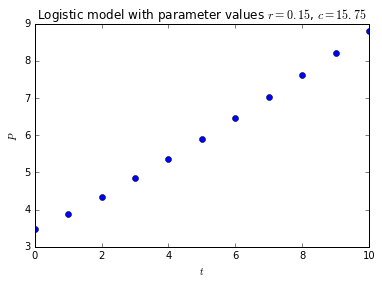

In [7]:
plt.plot(tvalues, Pvalues, 'o')
plt.xlabel('$t$')
plt.ylabel('$P$')
plt.title('Logistic model with parameter values $r={}$, $c={}$'.format(r,c))
None

The details of this code are as follows:

- **Line 1**: Create a plot with ``tvalues`` on the horizontal axis and ``Pvalues`` on the vertical axes, using a filled circle as plot symbol (as specifyied by the argument ``'o'``).
- **Line 2**: Set the label for the horizontal axis to ``'$t$'``. The dollar signs specify the use of Latex.
- **Line 3**: Set the label for the vertical axis to ``'$P$'``.
- **Line 4**: Set the title of the plot. We use a formatted Python string to insert the values of $r$ and $c$ in the title string.
- **Line 5**: We add ``None`` as the last line, to prevent Jupyter from printing the result of the last call in the plot construction. Most functions of the module ``plt`` return a value, but we usually won't need to see what this value is.

Solutions of differential equations are continuous curves. The following cell shows how to modify the computation to obtain a continuous graph. We also put all code needed to build the graph in a single cell, which is safer from the point of view of the computation, but may make the code a little harder to read.

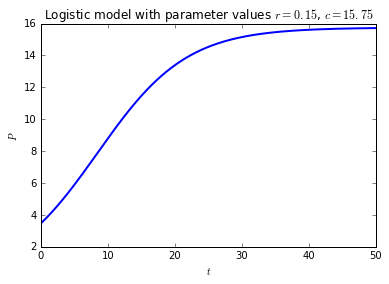

In [8]:
r, c = 0.15, 15.75
t0, P0 = 0, 3.47
tmin, tmax = 0, 50
tstep = 0.01
tvalues, Pvalues = detools.solve_de(logistic_model, t0, P0, tmin, tmax, tstep, args=(r,c))
plt.plot(tvalues, Pvalues, lw=2)
plt.xlabel('$t$')
plt.ylabel('$P$')
plt.title('Logistic model with parameter values $r={}$, $c={}$'.format(r,c))
None

Most of the above is repetition of code that we have already seen. We just comment on the differences:

- **Lines 3 and 4**: The solution interval is now set to $[0,50]$, with a time step of $0.01$.
- **Line 5**: The solution now is directly unpacked in the arrays ``tvalues``, ``Pvalues``.
- **Line 6**: In the ``plot`` call, we do not specify a symbol, so that the points are connected by a line. The option ``lw=2`` specifies the line width.

Notice that the solution, as expected, converges to a stable equilibrium. The logistic model theory says that this limit should be equal to the carrying capacity $c=15.75$. We can verify this by displaying the value of the solution at the last computed time:

In [9]:
Pvalues[-1]

15.719232548103873

The notation ``Pvalues[-1]`` is used to access the last element of an array. This is close to the expected limit.

In general, we want to plot various solutions simultaneously. The following cell shows how to do that.

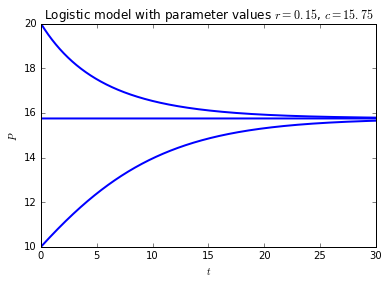

In [10]:
r, c = 0.15, 15.75
t0 = 0
tmin, tmax = 0, 30
tstep = 0.01
inits = [10.0, 15.75, 20]
for P0 in inits:
    tvalues, Pvalues = detools.solve_de(logistic_model, t0, P0, tmin, tmax, tstep, args=(r,c))
    plt.plot(tvalues, Pvalues, lw=2, color='blue')
plt.xlabel('$t$')
plt.ylabel('$P$')
plt.title('Logistic model with parameter values $r={}$, $c={}$'.format(r,c))
None

The code above is just slightly different from the one in the examples above, the main differences are in lines 6 to 8:

    inits = [5.0, 15.75, 40]
    for P0 in inits:
        tvalues, Pvalues = detools.solve_de(logistic_model, t0, P0, tmin, tmax, tstep, args=(r,c))
        plt.plot(tvalues, Pvalues, lw=2, color='blue')

We start by defining a Python list containing the values $5.0$, $15.75$ and $40$. These are initial population values we want to plot. We then start a ``for`` loop, with:

    for P0 in inits:
        ...
    
This causes Python to iterate over the list ``inits``, assigning each list element to ``P0`` in succession. For each value, the two indented statements in the body of the loop are executed. The first statement computes the solution, and the second adds the solution to the plot. 

**Important note**: Indentation is the way statement blocks are specified in Python. Other computer languages typically use curly braces ``{...}`` to enclose statement blocks. Using correct indentation is extremely important. In the example above, the block of the ``for`` consists of the next two lines, and lines 9 to 11 are _not_ in the block, so they are executed only once after the loop is finished.

Another small difference in the code appears in the call to ``plot``, where we specify the option ``color=blue``, since we want all curves to have the same color.

From the mathematical point of view, we can see that all solutions converge to the expected value, given by the carrying capacity. Notice that the carrying capacity itself is included in the set of initial conditions, corresponding to the horizontal line in the plot.

### Exercise 1

Using the methods outlined above, investigate the logistic systems with parameters
$$
r = 2.54,\quad C=21.55
$$
and
$$
r = 0.023, \quad C=3.22
$$
For each set of parameters, write code that generates a plot of the solutions for at least three initial conditions, one at the equilibrium population, one below the equilibrium and one above the equilibrium.

Enter your solution in the code cells below. Add more code cells if necessary.

My equation is very pretty

- First
- Last

$\int_{-\infty}^{\infty}e^{-x^2}\,dx$

Enter text

## Harvesting at a Constant Rate

Suppose that we work for a fishery, and want to manage the fish population. Let's assume first that fish are harveted at a constant rate $h$. The logistic model then is changed to:
$$
P'=rP\left(1-\frac{P}{c}\right)-h
$$

In the next set of exercises, we will investigate this harvesting strategy.

### Exercise 2

Let's first consider the parameter values $r=0.15$, $c=15.75$, $h=0.25$. Graph the solutions for 5 different values of the initial condition. Describe the assymptotic behavior of the solutions. It is specially important to know if there are initial conditions for which the population becomes extinct, so explore carefully this possibility.

### Exercise 3

Now consider the parameter values $r=0.15$, $c=15.75$, $h=0.75$. Graph the solutions for 5 different values of the initial condition. Describe the assymptotic behavior of the solutions. How does the behavior of the system in this case differs from the one in the previous system? Explain your conclusion both in mathematical terms and in terms that could be easily understood by someone without mathematical background.

### Exercise 4

Let's continue to assume that $r=0.15$ and $c=15.75$.
We want to know what is the largest value of the harvesting rate $h$ for which there is no extinction, if the initial population is large enough. Explain how to use a numerical simulation to solve your problem. The precision of your answer will depend on how much effort, and how many simulations, you are willing to perform.

### Exercise 5

Repeat the analysis of Exercise 4 for the parameter sets given in Exercise 1.

## Harvesting a Fixed Proportion of the Population

An alternate harvesting model would be to harvest a fixed proportion of the population. The corresponding model would be:
$$
P'=rP\left(1-\frac{P}{c}\right)-fP
$$
The parameter $f$ represents the fraction of the population that is harvested per unit of time. 

### Exercise 5

Investigate the model above, and do numerical simulations to study the assymptotic behavior of the population as $t\to\infty$. Follow the outline given in the previous exercises. Consider the following three sets of parameters:
$$
r = 0.15,\quad C=15.75
$$
$$
r = 2.54,\quad C=21.55
$$
and
$$
r = 0.023, \quad C=3.22
$$
For each parameter set do the following:

1. Choose three values of $f$ and, for each $f$, plot the solution curves for 5 different initial conditions. (Note: there will be a total of 9 simulations.)
2. Describe the assymptotic behavior of the solutions for each of the systems.
3. Investigate the question of whether there are values of $f$ for which the population becomes extinct.